Расчет молекулярной массы пектина косвенным методом по определению вязкости растворов с помощью вискозиметра Уббелоде

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data = pd.DataFrame(
    {
        'C': [0.05, 0.10, 0.15, 0.20, 0.25],
        'T1': [14.12, 16.82, 19.08, 21.65, 24.18],
        'T2': [14.28, 16.77, 19.22, 21.68, 24.36],
        'T3': [14.25, 16.78, 19.22, 21.79, 24.34]
    }
)

data

,C,T1,T2,T3
0,0.05,14.12,14.28,14.25
1,0.10,16.82,16.77,16.78
2,0.15,19.08,19.22,19.22
3,0.20,21.65,21.68,21.79
4,0.25,24.18,24.36,24.34


In [4]:
T_H2O = sum([11.07, 11.14, 11.13])/3
data['T'] = data[['T1', 'T2', 'T3']].mean(axis=1)
data = data.drop(['T1', 'T2', 'T3'], axis=1)

data['n_уд'] = (data['T']-T_H2O)/T_H2O

data['n_прив'] = data['n_уд']/data['C']

data['n_отн'] = data['T']/T_H2O

data['ln(n_отн)/C'] = np.log(data['n_отн'])/data['C']

data = data.round(2)

data

,C,T,n_уд,n_прив,n_отн,ln(n_отн)/C
0,0.05,14.22,0.28,5.58,1.28,4.93
1,0.10,16.79,0.51,5.11,1.51,4.13
2,0.15,19.17,0.73,4.84,1.73,3.64
3,0.20,21.71,0.95,4.77,1.95,3.35
4,0.25,24.29,1.19,4.74,2.19,3.13


Характеристическая вязкость = 5.61
R2 = 0.826


(4.7, 5.7)

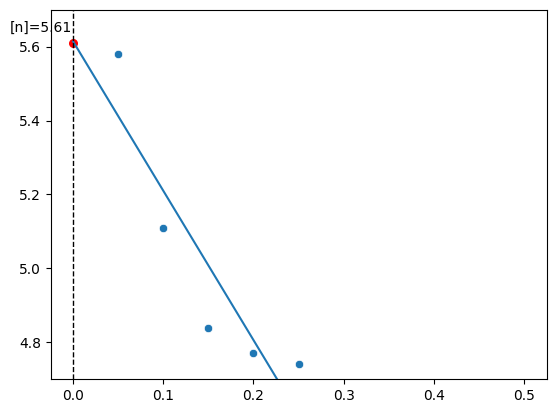

In [16]:
# from sklearn.preprocessing import PolynomialFeatures

X = data['C'].to_numpy().reshape(-1, 1)
y = data['n_прив'].to_numpy().reshape(-1, 1)

# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X=X, y=y)
y_pred = model.predict(X)

X_line = np.linspace(0, 0.5, 10).reshape(-1, 1)
y_pred_line = model.predict(X_line)

n = model.intercept_[0].round(2)
print(f'Характеристическая вязкость = {n}')
print(f'R2 = {r2_score(y, y_pred):.3f}')

# X_line = np.linspace(0, 0.5, 100).reshape(-1, 1)
# X_line_poly = poly.fit_transform(X_line)
# y_pred_line = model.predict(X_line_poly)

sns.scatterplot(x=X.ravel(), y=y.ravel())
sns.lineplot(x=X_line.ravel(), y=y_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n, color='red', s=30)
plt.text(-0.07, n + 0.03, f'[n]={n}', fontsize=10, color='black')
plt.ylim(4.7, 5.7)

Характеристическая вязкость = 5.15
R2 = 0.933


(3.0, 5.2)

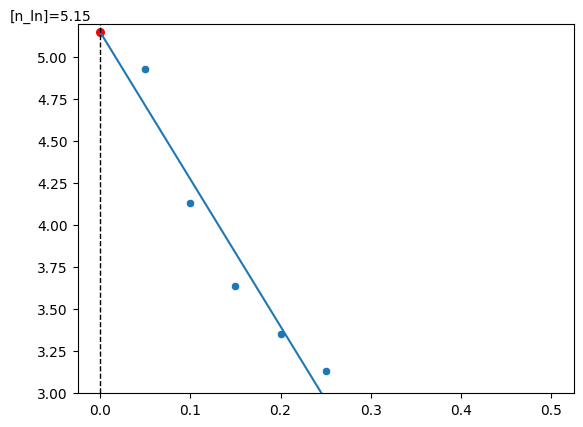

In [15]:
X = data['C'].to_numpy().reshape(-1, 1)
y_ln = data['ln(n_отн)/C'].to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(X=X, y=y_ln)
y_ln_pred = model.predict(X)
X_ln_line = np.linspace(0, 0.5, 10).reshape(-1, 1)
y_ln_pred_line = model.predict(X_ln_line)

n_ln = model.intercept_[0].round(2)
print(f'Характеристическая вязкость = {n_ln}')
print(f'R2 = {r2_score(y_ln, y_ln_pred):.3f}')

sns.scatterplot(x=X.ravel(), y=y_ln.ravel())
sns.lineplot(x=X_ln_line.ravel(), y=y_ln_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n_ln, color='red', s=30)
plt.text(-0.1, n_ln + 0.07, f'[n_ln]={n_ln}', fontsize=10, color='black')
plt.ylim(3.0, 5.2)

[n] = 5.61 | Молекулярная масса = 47.68 кДа
[n_ln] = 5.15 | Молекулярная масса (ln) = 44.45 кДа

Таблица с данными:
      C      T  n_уд  n_прив  n_отн  ln(n_отн)/C
0  0.05  14.22  0.28    5.58   1.28         4.93
1  0.10  16.79  0.51    5.11   1.51         4.13
2  0.15  19.17  0.73    4.84   1.73         3.64
3  0.20  21.71  0.95    4.77   1.95         3.35
4  0.25  24.29  1.19    4.74   2.19         3.13


Text(-0.1, 5.220000000000001, '[n_ln]=5.15')

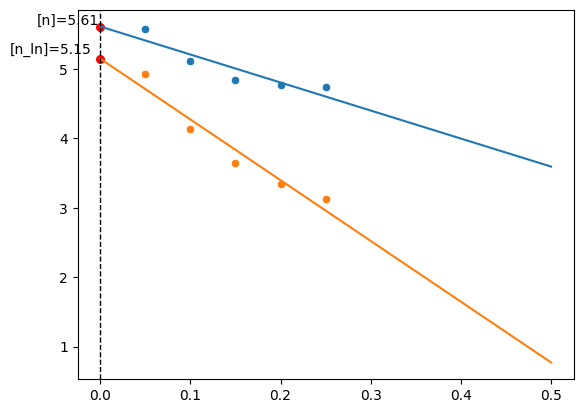

In [17]:
K = 1.1*10**(-5)
a = 1.22

MM = (n/K)**(1/1.22)/1000
print(f'[n] = {n} | Молекулярная масса = {MM:.2f} кДа')

MM_ln = (n_ln/K)**(1/1.22)/1000
print(f'[n_ln] = {n_ln} | Молекулярная масса (ln) = {MM_ln:.2f} кДа')

print(f'\nТаблица с данными:\n{data}')

sns.scatterplot(x=X.ravel(), y=y.ravel())
sns.lineplot(x=X_line.ravel(), y=y_pred_line.ravel())
sns.scatterplot(x=X.ravel(), y=y_ln.ravel())
sns.lineplot(x=X_ln_line.ravel(), y=y_ln_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n, color='red', s=30)
plt.scatter(0, n_ln, color='red', s=30)
plt.text(-0.07, n + 0.03, f'[n]={n:.2f}', fontsize=10, color='black')
plt.text(-0.1, n_ln + 0.07, f'[n_ln]={n_ln:.2f}', fontsize=10, color='black')

In [53]:
# расчет концентраций растворов пектина, при которых 1.1 < n_отн < 1.5

X = data['C'].to_numpy().reshape(-1, 1)
y = data['n_отн'].to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

l = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1]
predictions = []
for i in l:
    y_1 = model.predict([[i]]).ravel()[0].round(2)
    predictions.append(y_1)

df = pd.DataFrame({
    'C': l,
    'n_отн': predictions
})
df


,C,n_отн
0,0.01,1.10
1,0.02,1.14
2,0.04,1.23
3,0.06,1.33
4,0.08,1.42
5,0.10,1.51
